<a href="https://colab.research.google.com/github/sanjeev29/EVA-4/blob/master/S8/s8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/S8/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/S8


# Import Libraries

In [0]:
%matplotlib inline
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Import loader

* Initialize train and test loaders from train and test dataset respectively

* CUDA check

In [0]:
import loader

# Initialize CIFAR-10 classes
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck') 

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


# Plot training images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


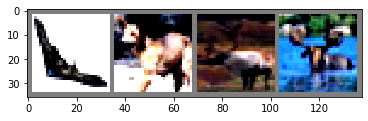

In [0]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(loader.trainloader_for_plot)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Import model

Initialize network for the model

In [0]:
import model

# Model parameters

In [0]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"Device: {device}")
net = model.ResNet18().to(device)
summary(net, input_size=(3, 32, 32))

Device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
        BasicBlock-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
      BatchNorm2d-10           [-1, 64, 32, 32]             128
          Dropout-11           [-1, 64, 32, 32]               0
           Conv2d-12           [-1, 64, 32, 32]          36,864
      BatchNorm2d-13           [-1, 64, 32, 32]             128
       BasicBlock-14      

# Loss function and optimizer



In [0]:
import torch.nn as nn
import torch.optim as optim

from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001)
scheduler = StepLR(optimizer, step_size=8, gamma=0.2)

# Training and Testing

In [0]:
import train
import test

# Training and testing our model

In [0]:
epochs = 50

for epoch in range(epochs):
  train.train(net, device, loader.trainloader, optimizer, criterion, epoch)
  test.test(net, device, loader.testloader, criterion)

Epoch= 0 Loss=1.3550525903701782 Batch_id=390 Accuracy=36.32: 100%|██████████| 391/391 [00:29<00:00, 14.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0127, Accuracy: 4292/10000 (42.92%)



Epoch= 1 Loss=1.3317559957504272 Batch_id=390 Accuracy=52.56: 100%|██████████| 391/391 [00:29<00:00, 14.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0105, Accuracy: 5418/10000 (54.18%)



Epoch= 2 Loss=1.103062391281128 Batch_id=390 Accuracy=60.91: 100%|██████████| 391/391 [00:29<00:00, 14.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0090, Accuracy: 5976/10000 (59.76%)



Epoch= 3 Loss=0.9203318357467651 Batch_id=390 Accuracy=66.85: 100%|██████████| 391/391 [00:29<00:00, 14.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0073, Accuracy: 6716/10000 (67.16%)



Epoch= 4 Loss=0.6818720698356628 Batch_id=390 Accuracy=70.91: 100%|██████████| 391/391 [00:29<00:00, 14.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0068, Accuracy: 7009/10000 (70.09%)



Epoch= 5 Loss=0.581041693687439 Batch_id=390 Accuracy=74.26: 100%|██████████| 391/391 [00:29<00:00, 14.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0057, Accuracy: 7496/10000 (74.96%)



Epoch= 6 Loss=0.5703283548355103 Batch_id=390 Accuracy=76.99: 100%|██████████| 391/391 [00:29<00:00, 14.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0057, Accuracy: 7518/10000 (75.18%)



Epoch= 7 Loss=0.704176664352417 Batch_id=390 Accuracy=79.50: 100%|██████████| 391/391 [00:29<00:00, 13.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0053, Accuracy: 7738/10000 (77.38%)



Epoch= 8 Loss=0.6354020833969116 Batch_id=390 Accuracy=81.26: 100%|██████████| 391/391 [00:29<00:00, 14.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0048, Accuracy: 7909/10000 (79.09%)



Epoch= 9 Loss=0.522931694984436 Batch_id=390 Accuracy=83.10: 100%|██████████| 391/391 [00:29<00:00, 14.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0053, Accuracy: 7812/10000 (78.12%)



Epoch= 10 Loss=0.48056840896606445 Batch_id=390 Accuracy=84.82: 100%|██████████| 391/391 [00:29<00:00, 14.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0048, Accuracy: 8007/10000 (80.07%)



Epoch= 11 Loss=0.4152646064758301 Batch_id=390 Accuracy=86.14: 100%|██████████| 391/391 [00:29<00:00, 14.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0046, Accuracy: 8092/10000 (80.92%)



Epoch= 12 Loss=0.4536201059818268 Batch_id=390 Accuracy=87.60: 100%|██████████| 391/391 [00:29<00:00, 14.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0049, Accuracy: 8070/10000 (80.70%)



Epoch= 13 Loss=0.3121715486049652 Batch_id=390 Accuracy=88.65: 100%|██████████| 391/391 [00:29<00:00, 14.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0046, Accuracy: 8162/10000 (81.62%)



Epoch= 14 Loss=0.15527306497097015 Batch_id=390 Accuracy=89.78: 100%|██████████| 391/391 [00:29<00:00, 14.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0046, Accuracy: 8179/10000 (81.79%)



Epoch= 15 Loss=0.21877889335155487 Batch_id=390 Accuracy=90.78: 100%|██████████| 391/391 [00:29<00:00, 13.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0047, Accuracy: 8203/10000 (82.03%)



Epoch= 16 Loss=0.13361617922782898 Batch_id=390 Accuracy=91.69: 100%|██████████| 391/391 [00:29<00:00, 14.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0045, Accuracy: 8280/10000 (82.80%)



Epoch= 17 Loss=0.3033001124858856 Batch_id=390 Accuracy=92.76: 100%|██████████| 391/391 [00:29<00:00, 14.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0052, Accuracy: 8130/10000 (81.30%)



Epoch= 18 Loss=0.21124267578125 Batch_id=390 Accuracy=93.72: 100%|██████████| 391/391 [00:29<00:00, 14.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0048, Accuracy: 8272/10000 (82.72%)



Epoch= 19 Loss=0.22130551934242249 Batch_id=390 Accuracy=93.99: 100%|██████████| 391/391 [00:29<00:00, 14.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0047, Accuracy: 8331/10000 (83.31%)



Epoch= 20 Loss=0.15852290391921997 Batch_id=390 Accuracy=94.81: 100%|██████████| 391/391 [00:29<00:00, 14.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0045, Accuracy: 8424/10000 (84.24%)



Epoch= 21 Loss=0.08679421246051788 Batch_id=390 Accuracy=95.28: 100%|██████████| 391/391 [00:29<00:00, 14.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0048, Accuracy: 8341/10000 (83.41%)



Epoch= 22 Loss=0.12165379524230957 Batch_id=390 Accuracy=96.04: 100%|██████████| 391/391 [00:29<00:00, 14.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0048, Accuracy: 8389/10000 (83.89%)



Epoch= 23 Loss=0.07524687051773071 Batch_id=390 Accuracy=96.51: 100%|██████████| 391/391 [00:29<00:00, 14.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0056, Accuracy: 8198/10000 (81.98%)



Epoch= 24 Loss=0.04025520011782646 Batch_id=390 Accuracy=96.83: 100%|██████████| 391/391 [00:29<00:00, 14.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0049, Accuracy: 8360/10000 (83.60%)



Epoch= 25 Loss=0.06884036958217621 Batch_id=390 Accuracy=97.17: 100%|██████████| 391/391 [00:29<00:00, 14.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0055, Accuracy: 8314/10000 (83.14%)



Epoch= 26 Loss=0.07055556774139404 Batch_id=390 Accuracy=97.34: 100%|██████████| 391/391 [00:29<00:00, 14.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0052, Accuracy: 8353/10000 (83.53%)



Epoch= 27 Loss=0.06834275275468826 Batch_id=390 Accuracy=97.71: 100%|██████████| 391/391 [00:29<00:00, 14.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0051, Accuracy: 8432/10000 (84.32%)



Epoch= 28 Loss=0.0754096508026123 Batch_id=390 Accuracy=98.01: 100%|██████████| 391/391 [00:29<00:00, 14.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0052, Accuracy: 8442/10000 (84.42%)



Epoch= 29 Loss=0.04887055233120918 Batch_id=390 Accuracy=98.08: 100%|██████████| 391/391 [00:29<00:00, 14.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0051, Accuracy: 8456/10000 (84.56%)



Epoch= 30 Loss=0.05170593410730362 Batch_id=390 Accuracy=98.32: 100%|██████████| 391/391 [00:29<00:00, 14.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0051, Accuracy: 8450/10000 (84.50%)



Epoch= 31 Loss=0.03558214753866196 Batch_id=390 Accuracy=98.40: 100%|██████████| 391/391 [00:29<00:00, 14.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0053, Accuracy: 8455/10000 (84.55%)



Epoch= 32 Loss=0.021075522527098656 Batch_id=390 Accuracy=98.40: 100%|██████████| 391/391 [00:29<00:00, 14.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0052, Accuracy: 8469/10000 (84.69%)



Epoch= 33 Loss=0.046602170914411545 Batch_id=390 Accuracy=98.60: 100%|██████████| 391/391 [00:29<00:00, 14.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0054, Accuracy: 8444/10000 (84.44%)



Epoch= 34 Loss=0.07567994296550751 Batch_id=390 Accuracy=98.62: 100%|██████████| 391/391 [00:29<00:00, 14.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0054, Accuracy: 8439/10000 (84.39%)



Epoch= 35 Loss=0.08648784458637238 Batch_id=390 Accuracy=98.74: 100%|██████████| 391/391 [00:29<00:00, 14.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0054, Accuracy: 8477/10000 (84.77%)



Epoch= 36 Loss=0.030871188268065453 Batch_id=390 Accuracy=98.88: 100%|██████████| 391/391 [00:29<00:00, 14.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0053, Accuracy: 8477/10000 (84.77%)



Epoch= 37 Loss=0.043158791959285736 Batch_id=390 Accuracy=98.92: 100%|██████████| 391/391 [00:29<00:00, 14.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0054, Accuracy: 8477/10000 (84.77%)



Epoch= 38 Loss=0.0097140371799469 Batch_id=390 Accuracy=98.96: 100%|██████████| 391/391 [00:29<00:00, 14.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0054, Accuracy: 8527/10000 (85.27%)



Epoch= 39 Loss=0.017518848180770874 Batch_id=390 Accuracy=99.02: 100%|██████████| 391/391 [00:29<00:00, 14.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0058, Accuracy: 8432/10000 (84.32%)



Epoch= 40 Loss=0.022932719439268112 Batch_id=390 Accuracy=99.10: 100%|██████████| 391/391 [00:29<00:00, 14.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0055, Accuracy: 8511/10000 (85.11%)



Epoch= 41 Loss=0.015419870615005493 Batch_id=390 Accuracy=99.17: 100%|██████████| 391/391 [00:29<00:00, 14.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0055, Accuracy: 8513/10000 (85.13%)



Epoch= 42 Loss=0.04857594519853592 Batch_id=390 Accuracy=99.13: 100%|██████████| 391/391 [00:29<00:00, 14.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0054, Accuracy: 8530/10000 (85.30%)



Epoch= 43 Loss=0.024329256266355515 Batch_id=390 Accuracy=99.23: 100%|██████████| 391/391 [00:29<00:00, 14.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0053, Accuracy: 8559/10000 (85.59%)



Epoch= 44 Loss=0.008673543110489845 Batch_id=390 Accuracy=99.26: 100%|██████████| 391/391 [00:29<00:00, 14.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0054, Accuracy: 8527/10000 (85.27%)



Epoch= 45 Loss=0.05539155751466751 Batch_id=390 Accuracy=99.41: 100%|██████████| 391/391 [00:29<00:00, 14.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0055, Accuracy: 8533/10000 (85.33%)



Epoch= 46 Loss=0.015536898747086525 Batch_id=390 Accuracy=99.30: 100%|██████████| 391/391 [00:29<00:00, 14.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0055, Accuracy: 8543/10000 (85.43%)



Epoch= 47 Loss=0.05209580808877945 Batch_id=390 Accuracy=99.42: 100%|██████████| 391/391 [00:29<00:00, 14.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0055, Accuracy: 8540/10000 (85.40%)



Epoch= 48 Loss=0.016224998980760574 Batch_id=390 Accuracy=99.40: 100%|██████████| 391/391 [00:29<00:00, 14.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0057, Accuracy: 8531/10000 (85.31%)



Epoch= 49 Loss=0.006104004569351673 Batch_id=390 Accuracy=99.35: 100%|██████████| 391/391 [00:29<00:00, 14.43it/s]



Validation set: Average loss: 0.0059, Accuracy: 8491/10000 (84.91%)



# Result visualization

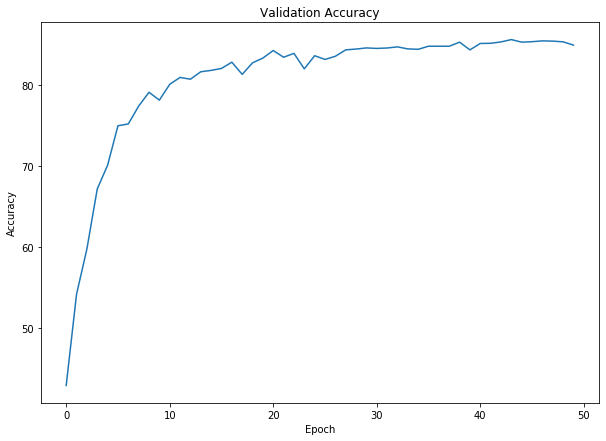

In [0]:
val_acc_fig, axs = plt.subplots(1,1,figsize=(10,7))
axs.plot(test.test_acc)
axs.set_title("Validation Accuracy")
axs.set_xlabel("Epoch")
axs.set_ylabel("Accuracy")
val_acc_fig.savefig('/content/gdrive/My Drive/Colab Notebooks/S8/validation_accuracy_change_plot.jpg')

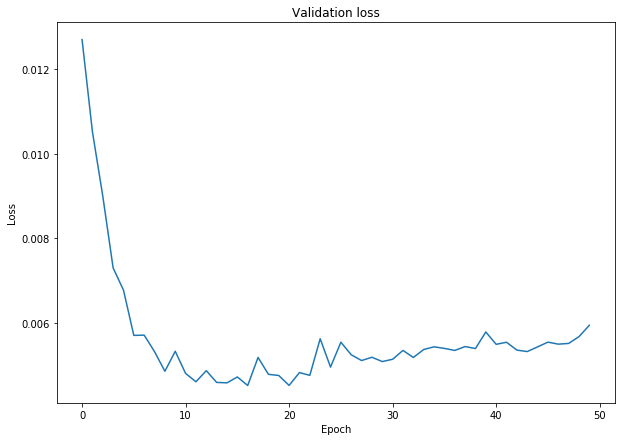

In [0]:
val_loss_fig, axs = plt.subplots(1,1,figsize=(10,7))

axs.plot(test.test_losses)
axs.set_title("Validation loss")
axs.set_xlabel("Epoch")
axs.set_ylabel("Loss")
val_loss_fig.savefig('/content/gdrive/My Drive/Colab Notebooks/S8/validation_loss_change_plot.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:   frog  frog   dog plane


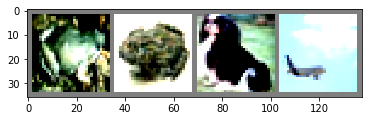

In [0]:
dataiter = iter(loader.testloader_for_plot)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [0]:
outputs = net(images.cuda())

The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [0]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   frog  frog   dog plane


That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [0]:
from tqdm import tqdm

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  pbar = tqdm(loader.testloader)
  for i, (data, target) in enumerate(pbar):
    data, target = data.to(device), target.to(device)
    outputs = net(data)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == target).squeeze()
    for i in range(4):
        label = target[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1


for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

100%|██████████| 79/79 [00:02<00:00, 38.13it/s]

Accuracy of plane : 86 %
Accuracy of   car : 86 %
Accuracy of  bird : 70 %
Accuracy of   cat : 80 %
Accuracy of  deer : 85 %
Accuracy of   dog : 79 %
Accuracy of  frog : 88 %
Accuracy of horse : 88 %
Accuracy of  ship : 82 %
Accuracy of truck : 100 %
